In [172]:
from datasets import load_dataset
import IPython.display as ipd
import numpy as np
from whisper_finetune.data.utils import inverse_mel_to_audio

In [319]:
ds = load_dataset('i4ds/sds-stt-spc-train-fold_0', split='train')

Using the latest cached version of the dataset since i4ds/sds-stt-spc-train-fold_0 couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at /home/kenfus/.cache/huggingface/datasets/i4ds___sds-stt-spc-train-fold_0/default/0.0.0/ce2f2365e930dbae045cabfb5857adfcfb40e6ca (last modified on Wed Apr 17 12:25:29 2024).


In [320]:
example = ds[2]['audio']['array']

In [324]:
ds[2]['text']

'<|0.00|> Für Bratwurst und Glühwein war an den Ständen ausreichend gesorgt.<|6.68|><|7.82|> In Basel wurden 37,3 Grad gemessen.<|10.94|><|10.94|> Doch ein Kommentar bringt den Mittelfeldspieler in Rage.<|15.68|><|16.28|> Das wissen wir wirklich zu schätzen.<|18.32|><|18.50|> Mit diesem sollen die Klubs stärker in die Verantwortung genommen werden.<|23.64|><|24.10|> Fast 50 Prozent der Ehen werden geschieden.<|27.34|><|29.10|>'

In [322]:
ipd.Audio(example, rate=16000)

In [268]:
import librosa
y, sr = librosa.load("STT.mp3", sr=None)  # y is the audio signal, sr is the sampling rate

In [269]:
y = librosa.resample(y, orig_sr=sr, target_sr=16000)

In [257]:
y.shape

(105131,)

In [176]:
from whisper_finetune.data.utils import TimeWarpAugmenter
import torchaudio.transforms as T
from whisper.audio import log_mel_spectrogram
import matplotlib.pyplot as plt

In [270]:
from whisper.audio import CHUNK_LENGTH, N_FRAMES, N_SAMPLES, log_mel_spectrogram, pad_or_trim

In [271]:
y.shape[0] - N_SAMPLES

-374869

In [307]:
example = np.pad(example, (0, N_SAMPLES- example.shape[0]), 'constant')

In [309]:
example

array([-0.00072112, -0.00107868, -0.0010904 , ..., -0.15705572,
       -0.15581989, -0.14271033])

In [311]:
example_mel = log_mel_spectrogram(example.astype(np.float32))

In [315]:
example_mel.shape[1]

3000

In [318]:
pad_or_trim(example_mel, 2999).shape

torch.Size([80, 2999])

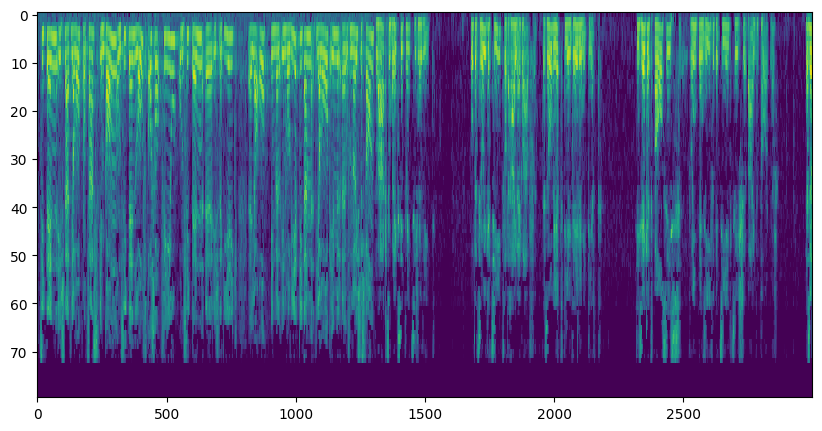

In [312]:
import matplotlib.pyplot as plt

# Create a larger figure
plt.figure(figsize=(10, 5))  # Width, height in inches

# Display the Mel spectrogram with a colormap and interpolation
plt.imshow(example_mel, aspect='auto', cmap='viridis', interpolation='nearest')


# Show the plot
plt.show()


In [301]:
time_masking = T.TimeMasking(time_mask_param=100)
freq_masking = T.FrequencyMasking(freq_mask_param=27)
time_warping = TimeWarpAugmenter(W=80)

In [302]:
y_t = time_masking(example_mel)

In [304]:
example_mel.shape

torch.Size([80, 3000])

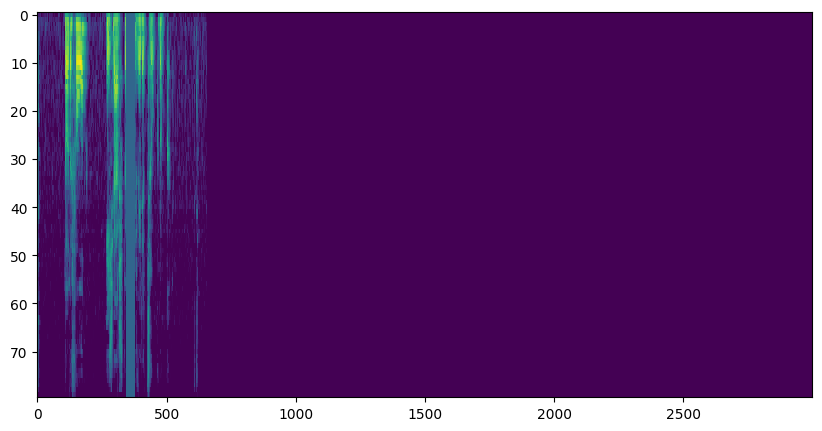

In [303]:
import matplotlib.pyplot as plt

# Create a larger figure
plt.figure(figsize=(10, 5))  # Width, height in inches

# Display the Mel spectrogram with a colormap and interpolation
plt.imshow(y_t, aspect='auto', cmap='viridis', interpolation='nearest')


# Show the plot
plt.show()


In [217]:
example_mel = log_mel_spectrogram(example.astype(np.float32))

In [182]:
example_mel.min()

tensor(-0.7080)

In [218]:
example_mel.shape

torch.Size([80, 3000])

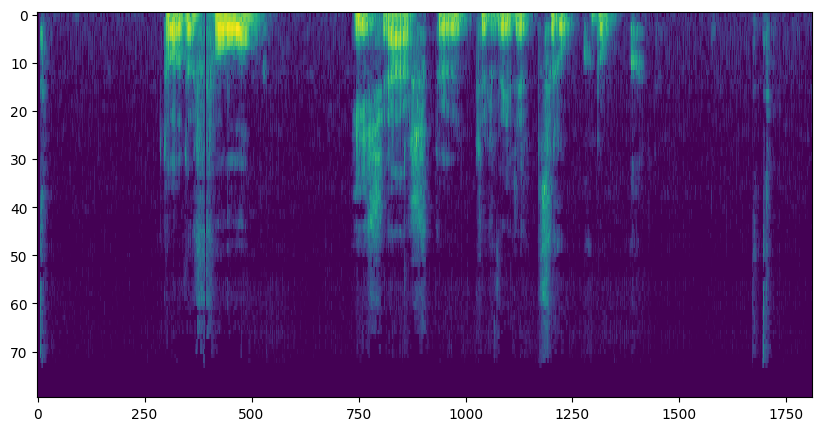

In [212]:
import matplotlib.pyplot as plt

# Create a larger figure
plt.figure(figsize=(10, 5))  # Width, height in inches

# Display the Mel spectrogram with a colormap and interpolation
plt.imshow(example_mel, aspect='auto', cmap='viridis', interpolation='nearest')


# Show the plot
plt.show()


In [107]:
example_mel_t = time_warping(example_mel)

In [111]:
example_mel_t.min()

tensor(-0.6530)

In [108]:
# Set padding value for spectrogram
padding_value = np.log10(1e-10)  # This is -10 before normalization

# Normalize and apply padding
log_spec = (example_mel_t + 4.0) / 4.0

# If you need to pad, use the normalized value of padding_value
normalized_padding_value = (padding_value + 4.0) / 4.0

In [109]:
normalized_padding_value

-1.5

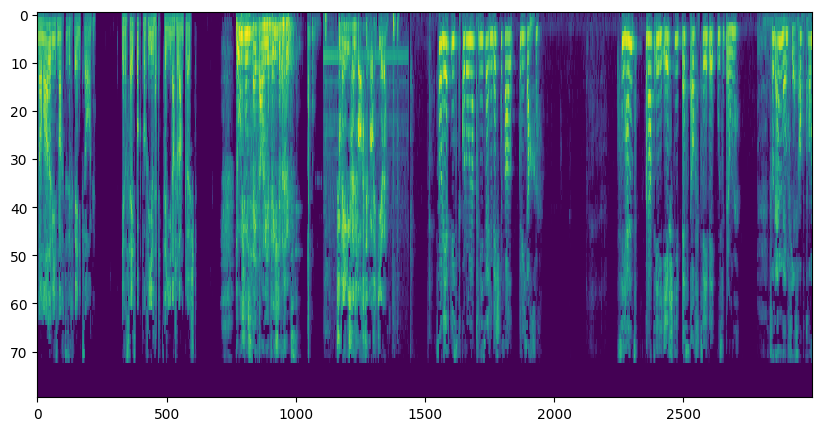

In [10]:
import matplotlib.pyplot as plt

# Create a larger figure
plt.figure(figsize=(10, 5))  # Width, height in inches

# Display the Mel spectrogram with a colormap and interpolation
plt.imshow(example_mel_t, aspect='auto', cmap='viridis', interpolation='nearest')
# Show the plot
plt.show()


In [104]:
example_mel_f = freq_masking(example_mel, mask_value=-0.5644)

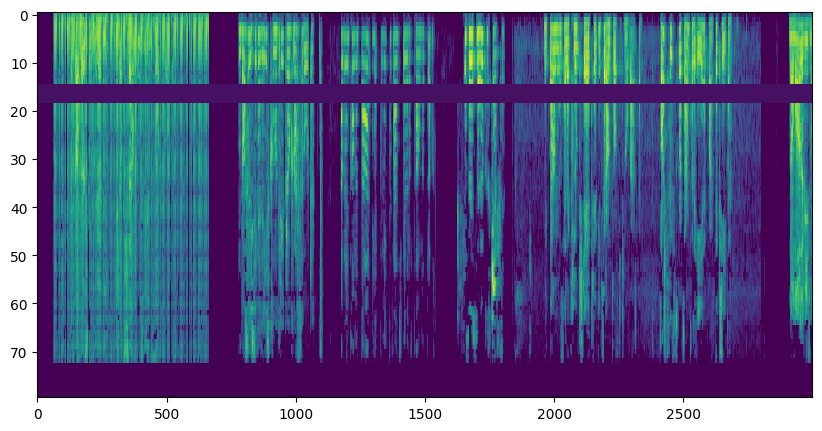

In [105]:
import matplotlib.pyplot as plt

# Create a larger figure
plt.figure(figsize=(10, 5))  # Width, height in inches

# Display the Mel spectrogram with a colormap and interpolation
plt.imshow(example_mel_f, aspect='auto', cmap='viridis', interpolation='nearest')
# Show the plot
plt.show()


In [11]:
inverse_example = inverse_mel_to_audio(example_mel_t)

In [12]:
ipd.Audio(inverse_example, rate=16000)